In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("election_results_2024.csv")
df=df.iloc[0:543]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Constituency        543 non-null    object 
 1   Const. No.          543 non-null    float64
 2   Leading Candidate   543 non-null    object 
 3   Leading Party       543 non-null    object 
 4   Trailing Candidate  542 non-null    object 
 5   Trailing Party      542 non-null    object 
 6   Margin              543 non-null    object 
 7   Status              543 non-null    object 
 8   ALLIANCE            543 non-null    object 
dtypes: float64(1), object(8)
memory usage: 38.3+ KB


In [4]:
df.isnull().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                0
Status                0
ALLIANCE              0
dtype: int64

In [5]:
df_null = df[df['Trailing Party'].isnull()]
df_null


,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status,ALLIANCE
493,Surat,24.0,MUKESHKUMAR CHANDRAKAANT DALAL,Bharatiya Janata Party,NaN,NaN,-,Uncontested,NDA


In [6]:
df["Margin"]=df["Margin"].replace('-',0)

In [7]:
df["Constituency"]=df['Constituency'].str.capitalize()

In [8]:
df["Const. No."]=pd.to_numeric(df["Const. No."])

In [9]:
df.iloc[493]

Constituency                                   Surat
Const. No.                                      24.0
Leading Candidate     MUKESHKUMAR CHANDRAKAANT DALAL
Leading Party                 Bharatiya Janata Party
Trailing Candidate                               NaN
Trailing Party                                   NaN
Margin                                             0
Status                                   Uncontested
ALLIANCE                                         NDA
Name: 493, dtype: object

In [10]:
df["Const. No."]=df["Const. No."].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int32 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
 8   ALLIANCE            543 non-null    object
dtypes: int32(1), object(8)
memory usage: 36.2+ KB


In [12]:
df

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status,ALLIANCE
0,Ajmer,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared,NDA
1,Alwar,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared,NDA
2,Ambala,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared,INDIA
3,Anantnag-rajouri,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared,INDIA
4,Arakkonam,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared,INDIA
...,...,...,...,...,...,...,...,...,...
538,Wardha,8,AMAR SHARADRAO KALE,Nationalist Congress Party – Sharadchandra Pawar,RAMDAS CHANDRABHAN TADAS,Bharatiya Janata Party,81648,Result Declared,INDIA
539,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,Result Declared,INDIA
540,West delhi,6,KAMALJEET SEHRAWAT,Bharatiya Janata Party,MAHABAL MISHRA,Aam Aadmi Party,199013,Result Declared,NDA
541,Yavatmal- washim,14,SANJAY UTTAMRAO DESHMUKH,Shiv Sena (Uddhav Balasaheb Thackrey),RAJSHRITAI HEMANT PATIL (MAHALLE),Shiv Sena,94473,Result Declared,INDIA


In [13]:
df["Margin"]=pd.to_numeric(df["Margin"])

In [14]:
party_votes = df.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)


In [15]:
party_votes

Leading Party
Bharatiya Janata Party                                      46081536
Indian National Congress                                    13005922
Dravida Munnetra Kazhagam                                    5081582
All India Trinamool Congress                                 4910963
Telugu Desam                                                 3660927
Samajwadi Party                                              2869566
Janata Dal (United)                                          1386413
Shiv Sena (Uddhav Balasaheb Thackrey)                        1015430
Communist Party of India (Marxist)                            746237
Lok Janshakti Party(Ram Vilas)                                720603
Nationalist Congress Party – Sharadchandra Pawar              716571
Indian Union Muslim League                                    702660
Shiv Sena                                                     700373
Independent                                                   629302
Jammu & Kashmir Nati

In [16]:
party_votes=pd.DataFrame(party_votes)
party_votes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Bharatiya Janata Party to Apna Dal (Soneylal)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Margin  42 non-null     int64
dtypes: int64(1)
memory usage: 1.7+ KB


In [17]:
sorted_df = df.sort_values("Margin", ascending=False)
sorted_constituency = sorted_df["Constituency"]
sorted_df=sorted_df[0:543]
sorted_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 543 entries, 221 to 493
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int32 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    int64 
 7   Status              543 non-null    object
 8   ALLIANCE            543 non-null    object
dtypes: int32(1), int64(1), object(7)
memory usage: 40.3+ KB


In [18]:
sorted_df

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status,ALLIANCE
221,Indore,26,SHANKAR LALWANI,Bharatiya Janata Party,SANJAY S/O LAKSHMAN SOLANKI,Bahujan Samaj Party,1175092,Result Declared,NDA
157,Dhubri,2,RAKIBUL HUSSAIN,Indian National Congress,MOHAMMED BADRUDDIN AJMAL,All India United Democratic Front,1012476,Result Declared,INDIA
525,Vidisha,18,SHIVRAJ SINGH CHOUHAN,Bharatiya Janata Party,PRATAPBHANU SHARMA,Indian National Congress,821408,Result Declared,NDA
384,Navsari,25,C R PATIL,Bharatiya Janata Party,NAISHADHBHAI BHUPATBHAI DESAI,Indian National Congress,773551,Result Declared,NDA
186,Gandhinagar,6,AMIT SHAH,Bharatiya Janata Party,SONAL RAMANBHAI PATEL,Indian National Congress,744716,Result Declared,NDA
...,...,...,...,...,...,...,...,...,...
226,Jaipur rural,6,RAO RAJENDRA SINGH,Bharatiya Janata Party,ANIL CHOPRA,Indian National Congress,1615,Result Declared,NDA
236,Jajpur,8,RABINDRA NARAYAN BEHERA,Bharatiya Janata Party,SARMISTHA SETHI,Biju Janata Dal,1587,Result Declared,NDA
40,Attingal,19,ADV ADOOR PRAKASH,Indian National Congress,V JOY,Communist Party of India (Marxist),684,Result Declared,INDIA
357,Mumbai north west,27,RAVINDRA DATTARAM WAIKAR,Shiv Sena,AMOL GAJANAN KIRTIKAR,Shiv Sena (Uddhav Balasaheb Thackrey),48,Result Declared,NDA


In [19]:
sorted_constituency

221               Indore
157               Dhubri
525              Vidisha
384              Navsari
186          Gandhinagar
             ...        
226         Jaipur rural
236               Jajpur
40              Attingal
357    Mumbai north west
493                Surat
Name: Constituency, Length: 543, dtype: object

In [20]:
highest_margin=sorted_df.iloc[0]
highest_margin

Constituency                               Indore
Const. No.                                     26
Leading Candidate                 SHANKAR LALWANI
Leading Party              Bharatiya Janata Party
Trailing Candidate    SANJAY S/O LAKSHMAN SOLANKI
Trailing Party                Bahujan Samaj Party
Margin                                    1175092
Status                            Result Declared
ALLIANCE                                      NDA
Name: 221, dtype: object

In [21]:
lowest_margin=sorted_df.iloc[-1]
lowest_margin

Constituency                                   Surat
Const. No.                                        24
Leading Candidate     MUKESHKUMAR CHANDRAKAANT DALAL
Leading Party                 Bharatiya Janata Party
Trailing Candidate                               NaN
Trailing Party                                   NaN
Margin                                             0
Status                                   Uncontested
ALLIANCE                                         NDA
Name: 493, dtype: object

In [22]:
leading_party_highest_votes = party_votes.iloc[0]
leading_party_highest_votes

Margin    46081536
Name: Bharatiya Janata Party, dtype: int64

In [23]:
leading_party_lowest_votes=party_votes.iloc[-1]
leading_party_lowest_votes

Margin    37810
Name: Apna Dal (Soneylal), dtype: int64

In [24]:
seats_won=df["Leading Party"].value_counts()
seats_won=pd.DataFrame(seats_won)
seats_won

,count
Leading Party,
Bharatiya Janata Party,240
Indian National Congress,99
Samajwadi Party,37
All India Trinamool Congress,29
Dravida Munnetra Kazhagam,22
Telugu Desam,16
Janata Dal (United),12
Shiv Sena (Uddhav Balasaheb Thackrey),9
Nationalist Congress Party – Sharadchandra Pawar,8


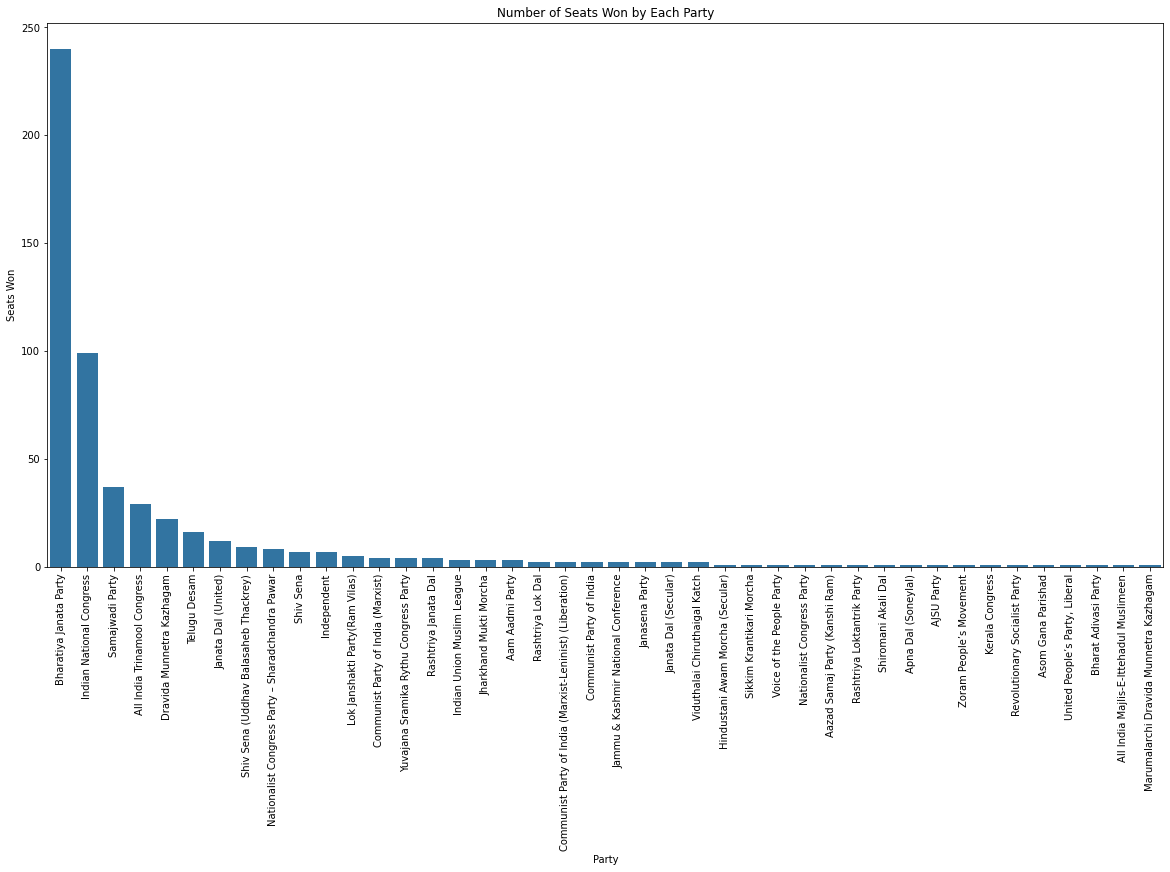

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(seats_won,x="Leading Party",y="count")
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=90)
plt.show()


In [26]:
def custom_plot(name):
    winning_candidate_name = df.loc[df["Constituency"] == name, "Leading Candidate"]
    losing_candidate_names = df.loc[df["Constituency"] == name, "Trailing Candidate"]
    margin=df.loc[df["Constituency"] == name, "Margin"]
    
    
    
    df_custom=pd.DataFrame({
        'Constituency': name,
        'Winning Candidate':winning_candidate_name,
        'Losing Candidate': losing_candidate_names,
        "Margin": margin
    })
    plt.figure(figsize=(7,7))
    plt.subplot(212)
    sns.barplot(data=df_custom,x=df_custom["Constituency"],y=df_custom["Margin"],width=0.03)

    return winning_candidate_name,losing_candidate_names,margin
    

In [27]:
def custom_plot_graph(name):
    winning_candidate_name = df.loc[df["Constituency"] == name, "Leading Candidate"]
    losing_candidate_names = df.loc[df["Constituency"] == name, "Trailing Candidate"]
    margin=df.loc[df["Constituency"] == name, "Margin"]
    
    
    
    df_custom=pd.DataFrame({
        'Constituency': name,
        'Winning Candidate':winning_candidate_name,
        'Losing Candidate': losing_candidate_names,
        "Margin": margin
    })
    plt.figure(figsize=(7,7))
    plt.subplot(212)
    sns.barplot(data=df_custom,x=df_custom["Constituency"],y=df_custom["Margin"],width=0.03)
    
#     sns.barplot(data=data_to_plot,x=name,y="Margin")

(186    AMIT SHAH
 Name: Leading Candidate, dtype: object,
 186    SONAL RAMANBHAI PATEL
 Name: Trailing Candidate, dtype: object,
 186    744716
 Name: Margin, dtype: int64)

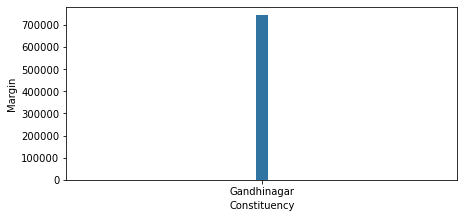

In [28]:
custom_plot("Gandhinagar")

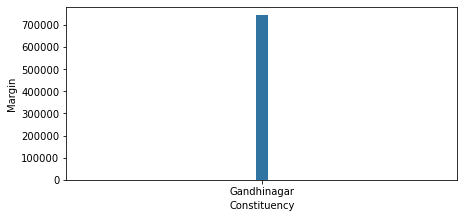

In [29]:
custom_plot_graph("Gandhinagar")

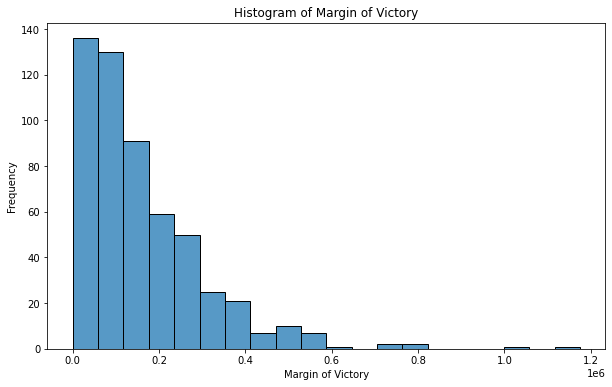

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Margin'], bins=20)
plt.title('Histogram of Margin of Victory')
plt.xlabel('Margin of Victory')
plt.ylabel('Frequency')
plt.show()


In [31]:
party_votes

,Margin
Leading Party,
Bharatiya Janata Party,46081536
Indian National Congress,13005922
Dravida Munnetra Kazhagam,5081582
All India Trinamool Congress,4910963
Telugu Desam,3660927
Samajwadi Party,2869566
Janata Dal (United),1386413
Shiv Sena (Uddhav Balasaheb Thackrey),1015430
Communist Party of India (Marxist),746237


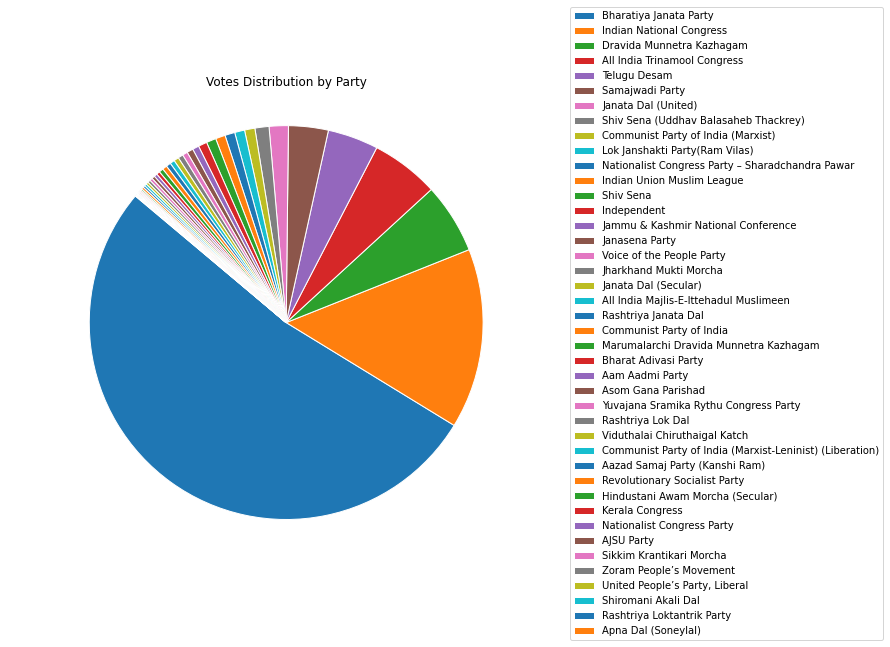

In [32]:

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(party_votes["Margin"], startangle=140, wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Party', pad=20)
plt.axis('equal')

plt.legend(labels=party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')


plt.show()

In [33]:
Alliance_seats = df.groupby('ALLIANCE').count()

In [34]:
Alliance_seats =pd.DataFrame(Alliance_seats["Margin"])
# Alliance_seats=pd.DataFrame(Alliance_seats["ALLIANCE","Leading Party"])
# Alliance_seats
Alliance_seats

,Margin
ALLIANCE,
INDIA,232
NDA,293
OTHER,18


In [35]:
Alliance_seats=Alliance_seats.sort_values(by="Margin" ,ascending=False)

<AxesSubplot:xlabel='ALLIANCE', ylabel='Margin'>

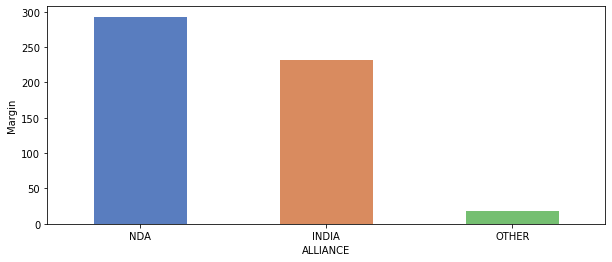

In [36]:
plt.figure(figsize=(10,4))
sns.barplot(data=Alliance_seats,x="ALLIANCE", y="Margin",palette="muted",hue="ALLIANCE",width=0.5)

In [37]:
df_bjp=pd.read_csv("BJP vs CONG.csv",usecols=[0,1,2])

In [38]:
df_bjp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           18 non-null     object
 1   BJP Seats 2019  18 non-null     int64 
 2   BJP Seats 2024  18 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [39]:
df_bjp

,State,BJP Seats 2019,BJP Seats 2024
0,Assam,9,9
1,Andhra Pradesh,0,3
2,Bihar,17,12
3,Chhattisgarh,9,10
4,Gujarat,26,25
5,Haryana,10,5
6,Jharkhand,11,8
7,Karnataka,25,17
8,Kerala,0,1
9,Madhya Pradesh,28,29


<AxesSubplot:>

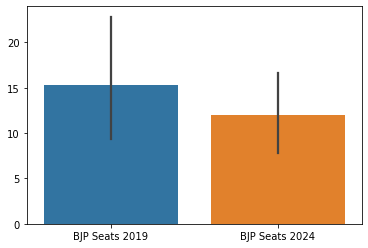

In [40]:
sns.barplot(data=df_bjp)

In [41]:
df_bjp_1= pd.melt(df_bjp, id_vars=['State'], value_vars=['BJP Seats 2019', 'BJP Seats 2024'],
                  var_name='Year', value_name='Seats')
df_bjp_1

,State,Year,Seats
0,Assam,BJP Seats 2019,9
1,Andhra Pradesh,BJP Seats 2019,0
2,Bihar,BJP Seats 2019,17
3,Chhattisgarh,BJP Seats 2019,9
4,Gujarat,BJP Seats 2019,26
5,Haryana,BJP Seats 2019,10
6,Jharkhand,BJP Seats 2019,11
7,Karnataka,BJP Seats 2019,25
8,Kerala,BJP Seats 2019,0
9,Madhya Pradesh,BJP Seats 2019,28


Text(0.5, 1.0, 'BJP 2019 VS 2024 Comparision')

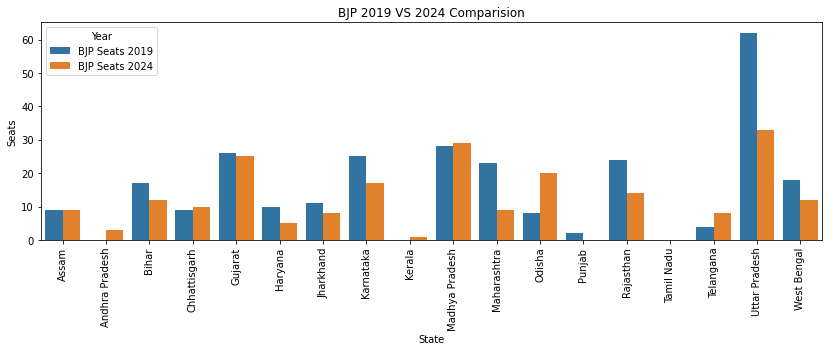

In [42]:
plt.figure(figsize=(14,4))
sns.barplot(data=df_bjp_1, x='State', y='Seats', hue='Year')
plt.xticks(rotation=90)
plt.title("BJP 2019 VS 2024 Comparision")

In [43]:
def BJP_seats(State):
    df_filtered=df_bjp_1[df_bjp_1["State"]==State]
    plt.figure(figsize=(5,4))
    sns.scatterplot(data=df_filtered,x="Year",y="Seats")
    return State

'Assam'

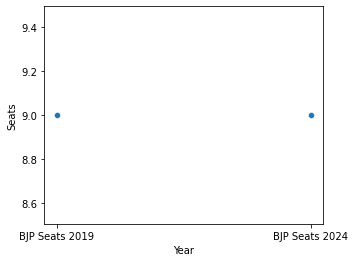

In [44]:
BJP_seats("Assam")

In [45]:
df_cong=pd.read_csv("BJP vs CONG.csv",usecols=[0,3,4])

In [46]:
df_cong

,State,Congress Seats 2019,Congress Seats 2024
0,Assam,3,3
1,Andhra Pradesh,0,0
2,Bihar,1,3
3,Chhattisgarh,2,1
4,Gujarat,0,1
5,Haryana,0,5
6,Jharkhand,1,2
7,Karnataka,1,9
8,Kerala,15,14
9,Madhya Pradesh,1,0


<AxesSubplot:>

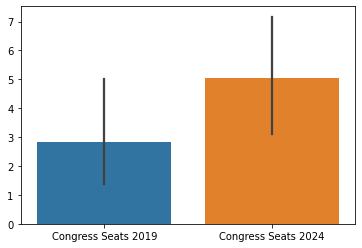

In [47]:
sns.barplot(data=df_cong)

In [48]:
df_cong_1= pd.melt(df_cong, id_vars=['State'], value_vars=['Congress Seats 2019', 'Congress Seats 2024'],
                  var_name='Year', value_name='Seats')
df_cong_1

,State,Year,Seats
0,Assam,Congress Seats 2019,3
1,Andhra Pradesh,Congress Seats 2019,0
2,Bihar,Congress Seats 2019,1
3,Chhattisgarh,Congress Seats 2019,2
4,Gujarat,Congress Seats 2019,0
5,Haryana,Congress Seats 2019,0
6,Jharkhand,Congress Seats 2019,1
7,Karnataka,Congress Seats 2019,1
8,Kerala,Congress Seats 2019,15
9,Madhya Pradesh,Congress Seats 2019,1


Text(0.5, 1.0, 'Congress 2019 VS 2024 Comparision')

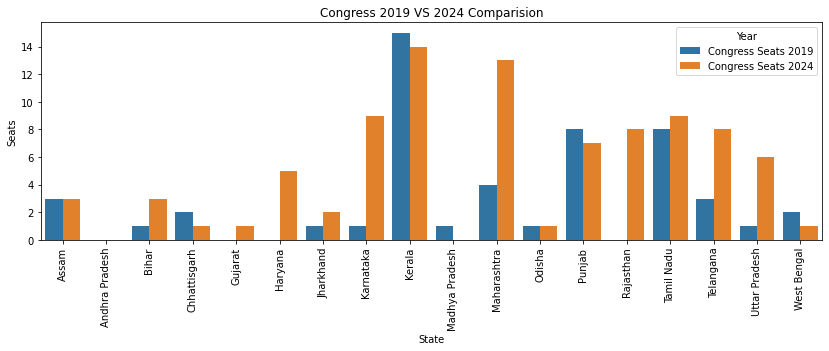

In [49]:
plt.figure(figsize=(14,4))
sns.barplot(data=df_cong_1, x='State', y='Seats', hue='Year')
plt.xticks(rotation=90)
plt.title("Congress 2019 VS 2024 Comparision")

In [50]:
def Congress_seats(State):
    df_filtered=df_cong_1[df_cong_1["State"]==State]
    plt.figure(figsize=(5,4))
    sns.scatterplot(data=df_filtered,x="Year",y="Seats")
    return State

'Kerala'

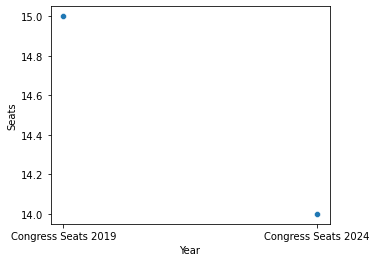

In [51]:
Congress_seats("Kerala")

In [52]:
df.to_csv("Indian_Elections_2024.csv")